In [8]:

from dask import dataframe as dd
from dask.distributed import Client, LocalCluster
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import argparse
import pdb
import os

import glob

REQUIRED_COLS = ['user_id', '30_minute_session_count', 'task_within_session_count', 'date_time']
LABEL_PATH = '../../contiguous_session_data_labelled/'
SUMMARY_STAT_PATH = '../../datasets/summary_stats_session'


In [9]:
df = pd.read_csv(SUMMARY_STAT_PATH + '/csv/elapsed_time_between_sessions.csv')



In [11]:
df_dropped = df.dropna()

In [16]:
df_dropped['elpased_time'] = np.ceil(df_dropped['elpased_time'])

/var/folders/0j/b_vrk25d4rx4y5184jll73240000gq/T/ipykernel_91281/593609164.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped['elpased_time'] = np.ceil(df_dropped['elpased_time'])


In [38]:

df_hist = np.histogram(df_dropped['elpased_time'], bins=np.arange(35, 30240, 30))

np.sum(df_hist[0]) / len(df_dropped)

0.9165101728607679

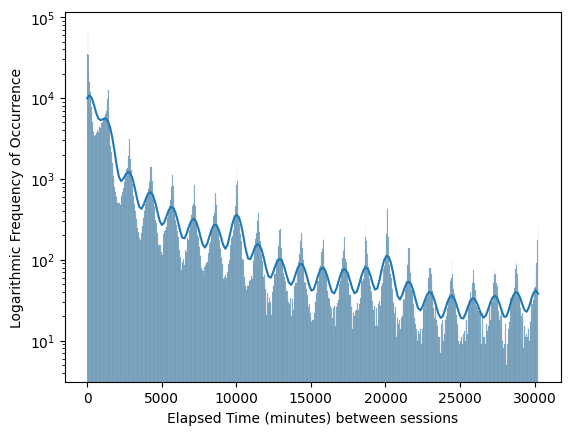

In [59]:
subset = df_dropped[df_dropped['elpased_time'] <= 30240]

ax = sns.histplot(subset['elpased_time'], kde=True, log_scale=(False, True), common_norm=False, common_bins=False)
ax.set(xlabel='Elapsed Time (minutes) between sessions', ylabel='Logarithmic Frequency of Occurrence')

statistics = df_dropped['elpased_time'].describe()

In [60]:
statistics = statistics.to_frame()



In [72]:
statistics.to_dict()

{'elpased_time': {'count': 545815.0,
  'mean': 7241.739677363209,
  'std': 29370.274374423698,
  'min': 0.0,
  '25%': 109.0,
  '50%': 913.0,
  '75%': 2534.0,
  'max': 429202.0}}

In [57]:
statistics[['mean', 'std', '25%', '50%', '75%', 'max']].to_clipboard(index=False)